In [3]:
# https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
# https://www.ijstr.org/final-print/mar2017/A-Review-Of-Synthetic-Data-Generation-Methods-For-Privacy-Preserving-Data-Publishing.pdf
# support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# data analysis and manipulation tool
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
# statistical graphs
import seaborn as sns

In [5]:
# Regression problem generation
# classification, regression and clustering algorithms
from sklearn.datasets import make_regression

In [23]:
# Generate a random regression problem for Heart Rate and Pulse Variability
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
data1 = make_regression(n_samples=100, n_features=4, n_informative=10, n_targets=1, 
                        bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, 
                        shuffle=True, coef=False, random_state=None)
df1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
df1['y'] = data1[1]

In [12]:
df1.head()

,x1,x2,x3,x4,y
0,1.126787,-0.050598,1.701903,0.449964,88.972834
1,1.009567,-0.509222,-0.401665,-0.933169,-69.932446
2,0.647738,-1.116727,-0.208146,2.179081,-116.316304
3,1.431016,-1.930392,0.561941,0.018575,-150.305751
4,-0.674747,0.049713,0.428318,0.958984,28.255191


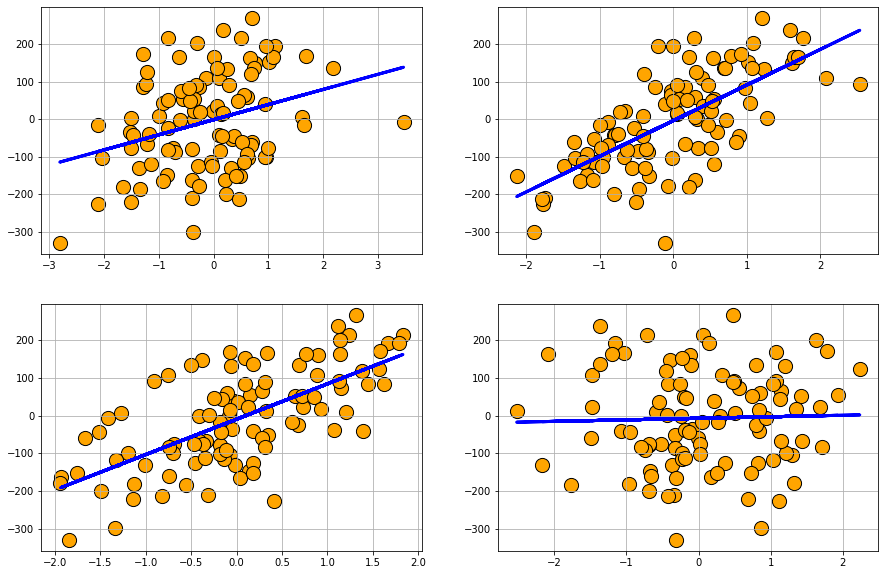

In [24]:
# Plot
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df1[df1.columns[i-1]],df1['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df1[df1.columns[i-1]],df1['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df1[df1.columns[i-1]],fit_fn(df1[df1.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

In [25]:
# Data with Gaussian noise
# statistical noise having a probability density function (PDF) equal to that of the normal distribution
data2 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=2.0, shuffle=True, coef=False, random_state=None)
df2 = pd.DataFrame(data2[0],columns=['x'+str(i) for i in range(1,5)])
df2['y'] = data2[1]

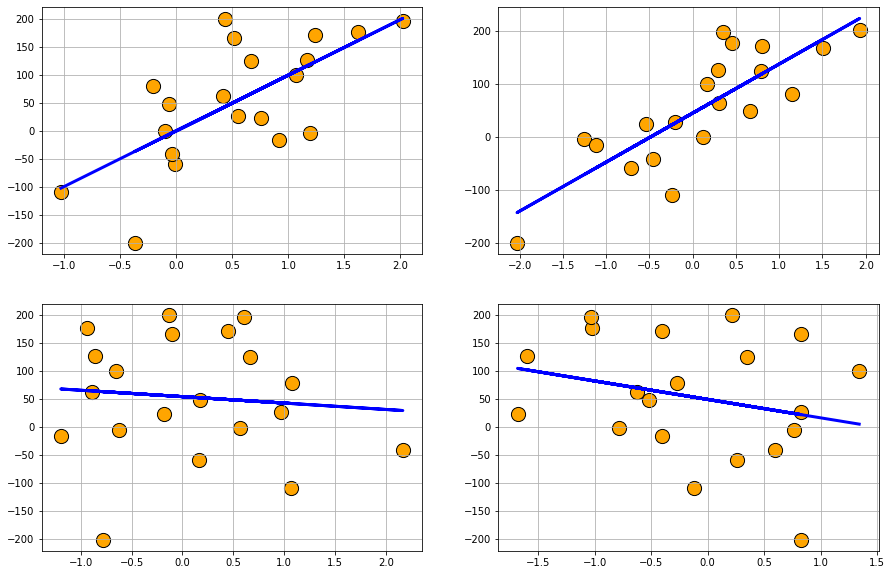

In [26]:
# Plot
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df2[df2.columns[i-1]],df2['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df2[df2.columns[i-1]],df2['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df2[df2.columns[i-1]],fit_fn(df2[df2.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

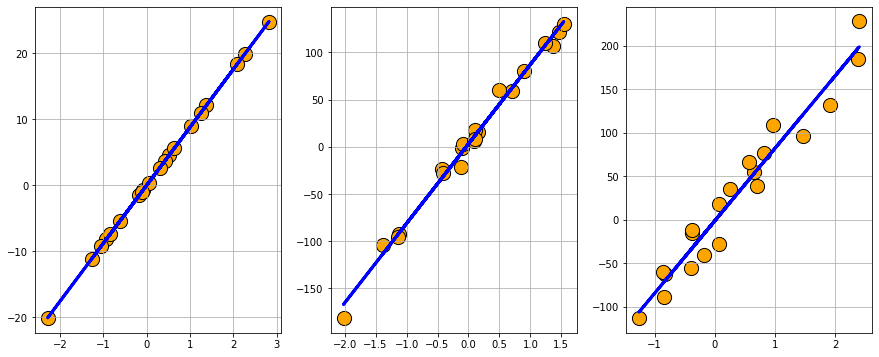

In [27]:
# Plot datasets with varying degree of noise
plt.figure(figsize=(15,6))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=i*10, shuffle=True, coef=False, random_state=None)
    df2['x'+str(i+1)]=data2[0]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    fit = np.polyfit(df2['x'+str(i+1)],df2['y'+str(i+1)],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)],df2['y'+str(i+1)],s=200,c='orange',edgecolor='k')
    plt.plot(df2['x'+str(i+1)],fit_fn(df2['x'+str(i+1)]),'b-',lw=3)
    plt.grid(True)